In [20]:
from pathlib import Path

import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn as skl

import time

from mylib import class_distributions
from mylib import data_selection
from mylib import helper_funcs

from mylib.my_xgb import BinaryDecisionTree as BDT
from mylib.my_xgb import add_class

from db_pipelines import db_add_trees_testing_pipeline as add_pipeline
from db_pipelines import db_continued_training_testing_pipeline as cont_pipeline


import dtreeviz
import logging
# to suppress messages when plotting trees
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
# open file

data_folder = Path("../../../data/DryBeanDataset/")
model_folder = Path("../../../models/DryBeanDataset")
file_to_open = data_folder / "Dry_Bean_Dataset.xlsx"

In [51]:
import os
os.listdir(Path("../.."))

['2023_Fischer_Incremental_Tabular_Learning',
 'Andres-Causality-Project',
 '2021_Meghana',
 '2022_Weise_Stiefel_Manifold',
 '2018_Stallmann_PCSTP_ILP',
 'README.md',
 '2021_Pandya_Topic_Embedding',
 '2021_Shweta_Clustering',
 '2019_shiva_spelling_correction',
 '2022_Fischer_TDAClustering',
 '.gitignore',
 '.git',
 '2019_Stallmann_GraphML',
 '2021_OzanTekin_Forecasting',
 '2020_Maria',
 '2021_MiguelAngel_TDA']

In [53]:
# read and prepare data

data = pd.read_excel(file_to_open)

labels_dict = {key:value for (value,key) in enumerate(data["Class"].unique())}
data["Class"] = data["Class"].map(labels_dict)
#data.Class.astype("category").cat.codes

# need feature matrix X and labels labels for xgboost
labels = data["Class"]
X = data.drop(["Class"],axis=1,inplace=False)

In [54]:
class_distributions.label_proportions(labels)

6    0.260525
5    0.193667
0    0.148924
4    0.141650
3    0.119756
1    0.097127
2    0.038351
Name: Class, dtype: float64

Adding class 6
Training full models
Accuracy of full model on old data:  0.9130738820327018
Accuracy of full model on new data:  0.9128646008519627
Accuracy of full model on test data:  0.9088888596915432
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


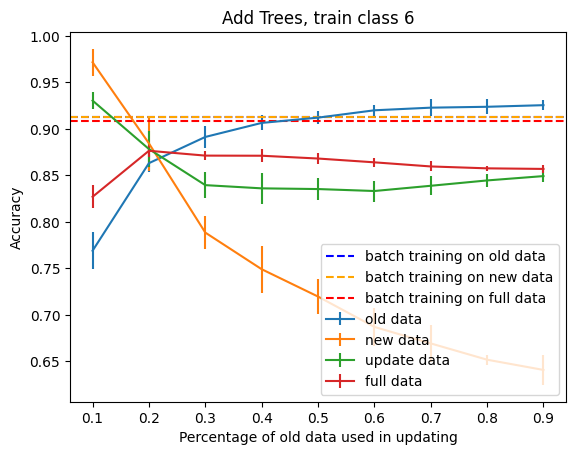

Adding class 5
Training full models
Accuracy of full model on old data:  0.9070381901338094
Accuracy of full model on new data:  0.9034832843501721
Accuracy of full model on test data:  0.902487656172252
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


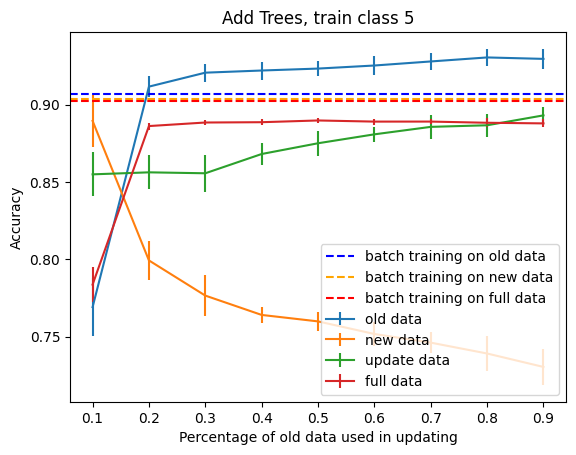

Adding class 0
Training full models
Accuracy of full model on old data:  0.9163053883724344
Accuracy of full model on new data:  0.916431946383393
Accuracy of full model on test data:  0.9106288757610693
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


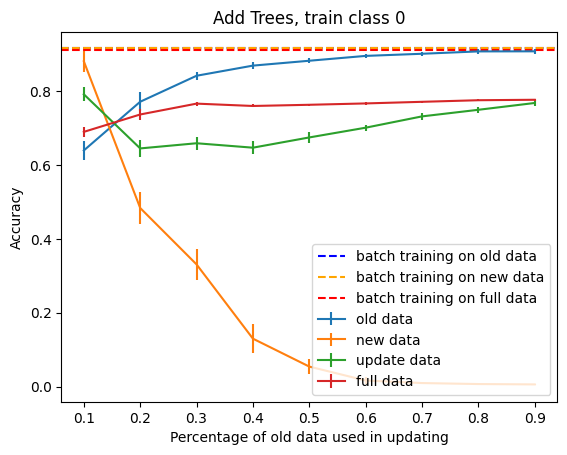

Adding class 4
Training full models
Accuracy of full model on old data:  0.9165757067576932
Accuracy of full model on new data:  0.9193815829949387
Accuracy of full model on test data:  0.9182688468577711
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


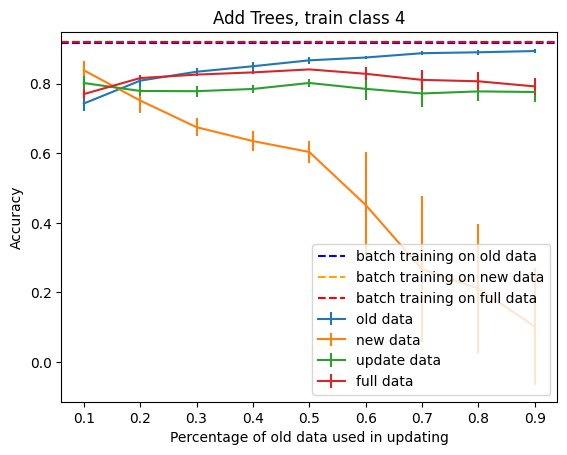

Adding class 3
Training full models
Accuracy of full model on old data:  0.9110470991977797
Accuracy of full model on new data:  0.9157770662320383
Accuracy of full model on test data:  0.9152967929895001
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


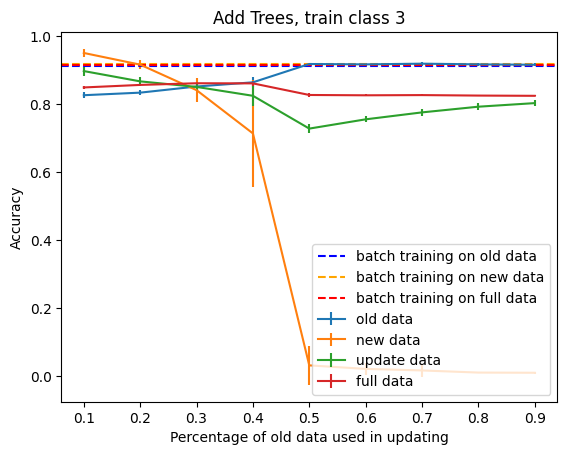

Adding class 1
Training full models
Accuracy of full model on old data:  0.9012714505634234
Accuracy of full model on new data:  0.8983905594174111
Accuracy of full model on test data:  0.8978798895153904
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


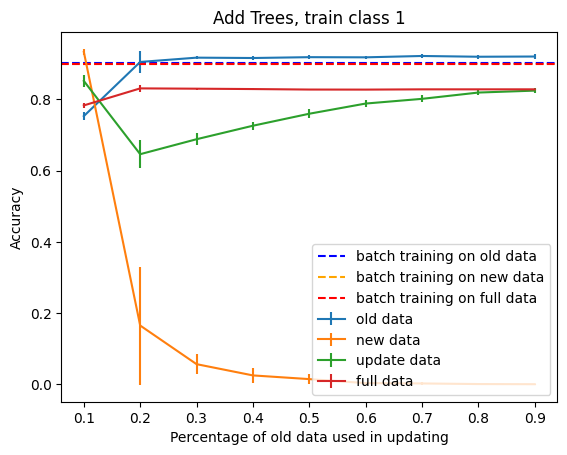

Adding class 2
Training full models
Accuracy of full model on old data:  0.9347183042800316
Accuracy of full model on new data:  0.9334158249190064
Accuracy of full model on test data:  0.9306323152678143
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


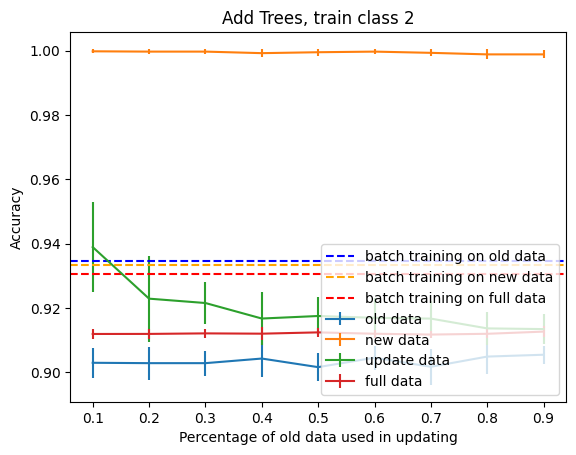

In [16]:
# go through all classes

for i in class_distributions.label_proportions(labels).index:
    new_class = i
    num_models = 20
    proportion_of_old_data = [i*0.1 for i in range(1,10)]

    add_pipeline.db_add_trees_testing_pipeline(new_class,
                                               proportion_of_old_data,
                                               num_models)

Adding class 4
Training full models
Accuracy of full model on old data:  0.9074398698964307
Accuracy of full model on new data:  0.9484128630705393
Accuracy of full model on test data:  0.9052221814175541
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


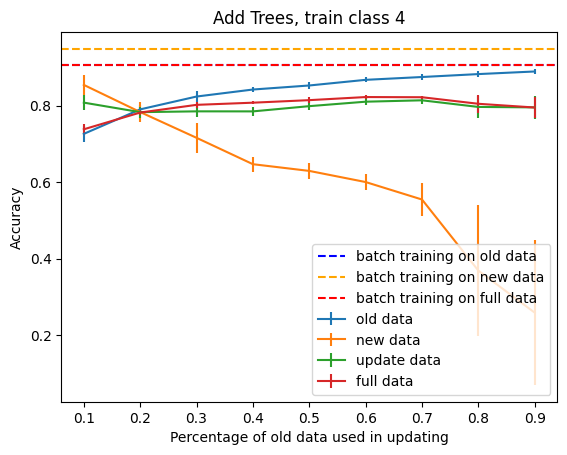

In [7]:
new_class = 4
num_models = 50
proportion_of_old_data = [i*0.1 for i in range(1,10)]

add_pipeline.db_add_trees_testing_pipeline(new_class,
                                           proportion_of_old_data,
                                           num_models)

Adding class 6
Training full models
Accuracy of full model on old data:  0.9114157973174366
Accuracy of full model on new data:  0.9159052453468697
Accuracy of full model on test data:  0.901946382666177
Current target proportion of old data in use: 0.1
Current target proportion of old data in use: 0.2
Current target proportion of old data in use: 0.30000000000000004
Current target proportion of old data in use: 0.4
Current target proportion of old data in use: 0.5
Current target proportion of old data in use: 0.6000000000000001
Current target proportion of old data in use: 0.7000000000000001
Current target proportion of old data in use: 0.8
Current target proportion of old data in use: 0.9


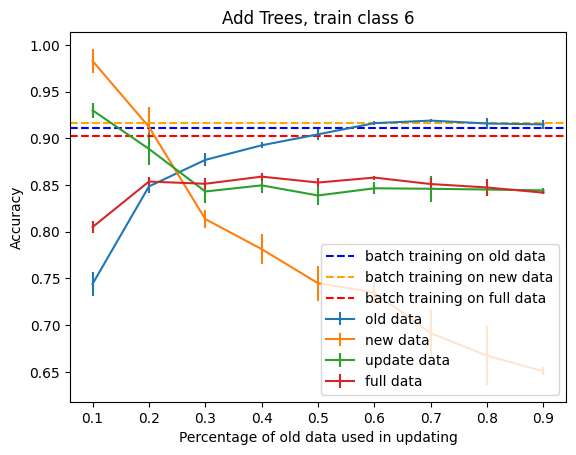

669.0450778699997


In [58]:
import time
# go through all classes
start = time.perf_counter()
new_class = 6
num_models = 5
proportion_of_old_data = [i*0.1 for i in range(1,10)]

add_pipeline.db_add_trees_testing_pipeline(new_class,
                                           proportion_of_old_data,
                                           num_models)

end = time.perf_counter()
print(end-start)